In [130]:
import os

import matplotlib.pyplot as plt


Набор данных
Набор данных содержит множество сообщений (файлов).
Если в названии файла есть подстрока legit, то это хорошее сообщение.
Если в названии файла есть подстрока spmsg, то это спам.
Сообщения состоят из заголовка и тела сообщения.
Каждое слово было заменено на определённое число.
Задание
Придумайте два способа учёта заголовка и тела сообщения при векторизации. Например: учитывать одинаково или учитывать раздельно.
Придумайте два способа векторизации текста. Например, для каждого слова создать признак: встретилось или нет, или сколько раз встретилось.
Табличный набор данных должен быть в разреженном виде.
Постройте Наивный байесовский классификатор на наборе данных.
Постройте ROC кривую. Вычислите для неё AUC. Выберете наилучшую комбинацию из первых двух пунктов относительно метрики AUC.

График не должен состоять из “одной точки”.
Измените априорное распределение для выбранной модели таким образом, чтобы число хороших сообщений классифицированных как спам равнялось нулю.
Постройте график зависимости точности классификации от изменения априорного распределения в логарифмированном пространстве.

[link](https://docs.google.com/document/d/196nNPobHv6zcTrx2d0hYTJT5hriLfZJOGOB9BAZV3Wo/edit#)


In [131]:
files_path = "data/txt"
good_msg_part = "legit"
bad_msg_part = "spmsg"

good_messages = []
bad_messages = []

for curr_name in os.listdir(files_path):
    if good_msg_part in curr_name:
        good_messages.append(curr_name)
    elif bad_msg_part in curr_name:
        bad_messages.append(curr_name)


In [132]:
good_messages

['100legit29.txt',
 '101002legit41.txt',
 '101006legit31.txt',
 '101024legit7.txt',
 '101076legit21.txt',
 '10108legit18.txt',
 '10147legit51.txt',
 '10157legit50.txt',
 '1015legit28.txt',
 '10170legit58.txt',
 '10170legit9.txt',
 '10227legit48.txt',
 '10231legit1.txt',
 '1025legit11.txt',
 '10300legit6.txt',
 '10303legit2.txt',
 '10337legit39.txt',
 '10359legit0.txt',
 '10364legit15.txt',
 '10403legit43.txt',
 '10405legit42.txt',
 '10405legit8.txt',
 '10421legit37.txt',
 '10439legit24.txt',
 '10452legit44.txt',
 '10498legit19.txt',
 '10511legit56.txt',
 '10520legit38.txt',
 '10524legit33.txt',
 '10530legit36.txt',
 '10570legit22.txt',
 '10594legit27.txt',
 '10601legit35.txt',
 '10602legit49.txt',
 '10607legit4.txt',
 '10610legit5.txt',
 '10614legit40.txt',
 '10625legit32.txt',
 '10630legit10.txt',
 '10634legit26.txt',
 '10655legit52.txt',
 '10678legit57.txt',
 '10679legit17.txt',
 '106legit45.txt',
 '10705legit14.txt',
 '10710legit59.txt',
 '10725legit46.txt',
 '10754legit54.txt',
 '1

In [133]:
bad_messages

['101011spmsg62.txt',
 '101019spmsg88.txt',
 '101035spmsg107.txt',
 '101035spmsg69.txt',
 '101058spmsg72.txt',
 '101086spmsg101.txt',
 '10149spmsg79.txt',
 '10184spmsg61.txt',
 '10205spmsg73.txt',
 '10209spmsg74.txt',
 '10210spmsg93.txt',
 '1021spmsg80.txt',
 '10249spmsg63.txt',
 '10258spmsg97.txt',
 '10259spmsg67.txt',
 '10289spmsg82.txt',
 '10313spmsg95.txt',
 '10327spmsg91.txt',
 '10337spmsg75.txt',
 '10365spmsg99.txt',
 '10439spmsg89.txt',
 '10471spmsg106.txt',
 '10510spmsg64.txt',
 '10513spmsg103.txt',
 '10522spmsg100.txt',
 '10528spmsg81.txt',
 '10573spmsg98.txt',
 '1057spmsg108.txt',
 '10615spmsg87.txt',
 '10631spmsg86.txt',
 '10661spmsg71.txt',
 '10661spmsg76.txt',
 '10673spmsg94.txt',
 '10677spmsg85.txt',
 '10694spmsg78.txt',
 '10739spmsg77.txt',
 '10749spmsg65.txt',
 '10768spmsg90.txt',
 '10773spmsg92.txt',
 '1077spmsg105.txt',
 '10810spmsg96.txt',
 '10865spmsg68.txt',
 '10867spmsg104.txt',
 '10885spmsg84.txt',
 '10908spmsg70.txt',
 '1094spmsg83.txt',
 '10953spmsg102.txt',
 '

In [134]:

all_clear_messages_1 = []
all_is_good_file = []

for file in os.listdir(files_path):  # iterate over the list of files
    with open(files_path + "/" + file, "r") as fin:  # open the file
        lines = [line.rstrip() for line in fin]
    curr_header = lines[0].replace('Subject: ', '')
    curr_body = lines[2]

    curr_header = ["h" + ms for ms in curr_header.split(' ')]
    curr_body = ["b" + ms for ms in curr_body.split(' ')]
    lines = ' '.join(str(x) for x in [curr_header, curr_body]).replace('  ', ' ')
    all_clear_messages_1.append(lines)
    all_is_good_file.append(int(good_msg_part in file))



In [135]:
from sklearn.feature_extraction.text import CountVectorizer

all_clear_messages_2 = []

for file in os.listdir(files_path):  # iterate over the list of files
    with open(files_path + "/" + file, "r") as fin:  # open the file
        lines = [line.rstrip() for line in fin]
    lines = ' '.join(str(x) for x in lines)
    lines = lines.replace('Subject: ', '').replace('  ', '')
    all_clear_messages_2.append(lines)


In [136]:
def transformer(inp_message):
    return CountVectorizer().fit_transform(inp_message).toarray()


count_array_1 = transformer(all_clear_messages_1)
count_array_2 = transformer(all_clear_messages_2)

In [137]:
def containsTransformer(inp_count_array):
    return [[int(curr_count > 0) for curr_count in line_counts] for line_counts in inp_count_array]


contains_array_1 = containsTransformer(count_array_1)
contains_array_2 = containsTransformer(count_array_2)


In [138]:
from scipy.sparse import csr_matrix

matrix_a_task_1 = csr_matrix(count_array_1)
matrix_b_task_1 = csr_matrix(contains_array_1)
matrix_a_task_2 = csr_matrix(count_array_2)
matrix_b_task_2 = csr_matrix(contains_array_2)



In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB


def processFunction(input_matrix, title=""):
    X_train, X_test, y_train, y_test = train_test_split(input_matrix, all_is_good_file, test_size=0.4, random_state=0)
    nbc = MultinomialNB()
    nbc.fit(X_train, y_train)

    y_pred_all = nbc.predict_proba(X_test)
    y_pred_all = y_pred_all[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_all)
    res_auc = auc(fpr, tpr)
    plt.title("ROC of '" + title + "'")
    plt.plot(fpr, tpr, label="ROC: " + str(res_auc))
    plt.show()
    print("AUC       :", str(res_auc))
    print("DOTS_COUNT:", len(fpr))

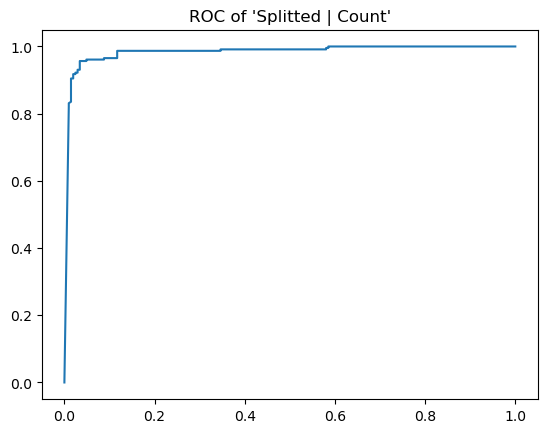

AUC       : 0.9836659275683667
DOTS_COUNT: 27


In [140]:
processFunction(matrix_a_task_1, "Splitted | Count")

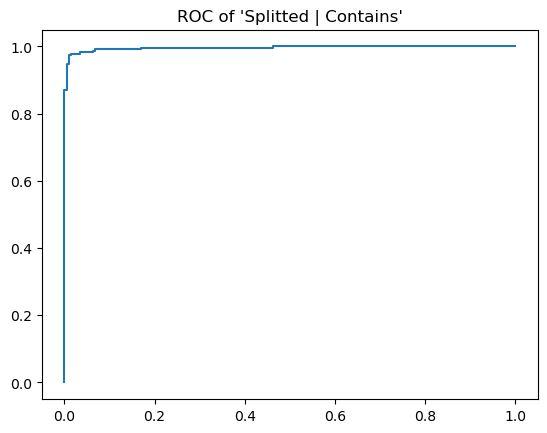

AUC       : 0.9958399324252983
DOTS_COUNT: 29


In [141]:
processFunction(matrix_b_task_1, "Splitted | Contains")

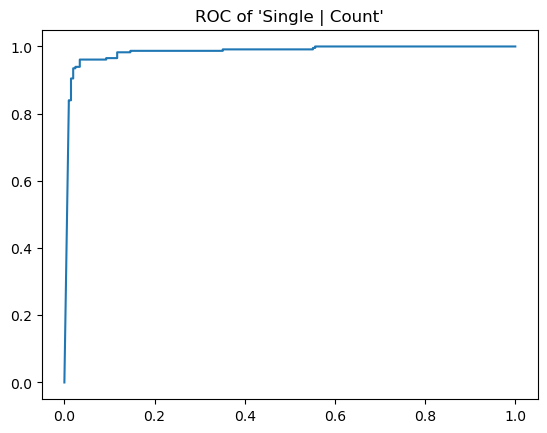

AUC       : 0.9840777109069792
DOTS_COUNT: 26


In [142]:
processFunction(matrix_a_task_2, "Single | Count")

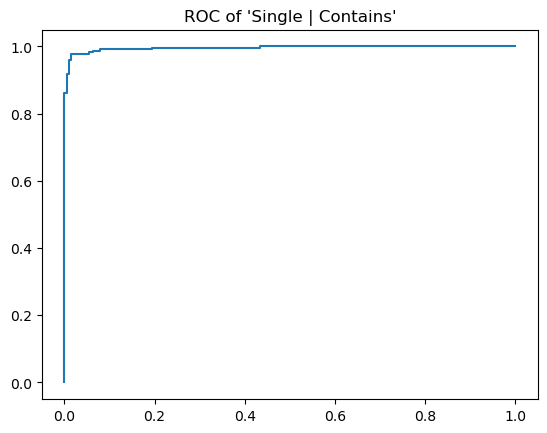

AUC       : 0.9954809418224053
DOTS_COUNT: 30


In [143]:
processFunction(matrix_b_task_2, "Single | Contains")

In [144]:
from sklearn.metrics import confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(matrix_b_task_1, all_is_good_file, test_size=0.4, random_state=0)
acc = []
a = -10
b = 1

for i in range(a, b):
    pri = 10 ** i
    clf = MultinomialNB(class_prior=[pri, 1])
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    res = confusion_matrix(y_test, pred)
    auc = roc_auc_score(y_test, pred) # т.к y_test и pred
    acc.append(res[1][1] + res[0][0])


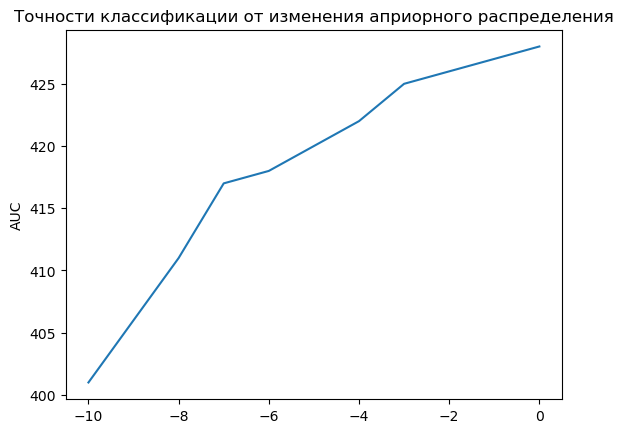

In [145]:
plt.title("Точности классификации от изменения априорного распределения")
plt.plot([int(i) for i in range(a, b)], acc)
plt.ylabel("AUC")
plt.show()